In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import statsmodels.api as sm # to build a LOWESS model
lowess = sm.nonparametric.lowess
from datetime import datetime, timedelta

import numpy as np
import matplotlib.dates as mdates
from matplotlib import gridspec
import matplotlib as mpl
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib
import netCDF4

data_dir = 'C:/Users/s1834371/Documents/PhD/melt22/GrIS_late-season-melt-event/data/'

In [2]:
IS_profiles = pd.read_csv(data_dir + 'velocity/profiles/IS_profile.csv', header=0, na_values=['-9999.0'])
RUSS_profiles = pd.read_csv(data_dir + 'velocity/profiles/RUSS_profile.csv', header=0, na_values=['-9999.0'])
NORTH_NUN_profiles = pd.read_csv(data_dir + 'velocity/profiles/NORTH_NUN_profile.csv', header=0, na_values=['-9999.0'])
SOUTH_NUN_profiles = pd.read_csv(data_dir + 'velocity/profiles/SOUTH_NUN_profile.csv', header=0, na_values=['-9999.0'])
UNNAMED_SOUTH_profiles = pd.read_csv(data_dir + 'velocity/profiles/UNNAMED_SOUTH_profile.csv', header=0, na_values=['-9999.0'])

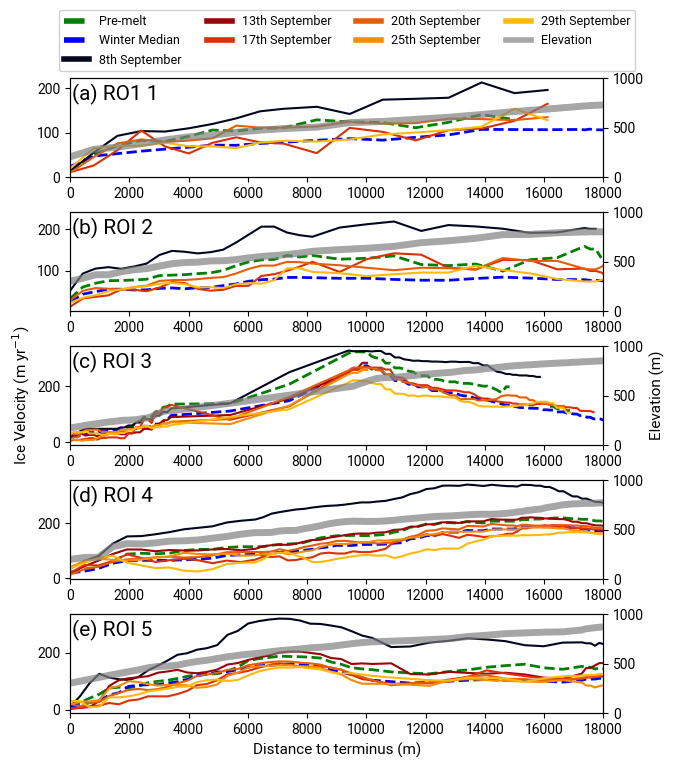

In [3]:


tick_fontsize = 10
label_fontsize = 11
title_fontsize = 11
mpl.rcParams['font.family'] = 'Roboto'
plt.rcParams['axes.linewidth'] = 0.8
plt.rc('xtick', labelsize=tick_fontsize)
plt.rc('ytick', labelsize=tick_fontsize)
plt.rc('axes', labelsize=label_fontsize)
plt.rc('axes', titlesize=title_fontsize)
plt.rc('legend', fontsize=label_fontsize)    # legend fontsize
plt.rc('figure', titlesize=title_fontsize)  # fontsize of the figure title
plt.rcParams['axes.facecolor'] = 'None'
plt.rcParams['savefig.facecolor']='w'
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

fig = plt.figure()
spec = gridspec.GridSpec(ncols=1, nrows=5, hspace=0.35)

# Isunguata sermia ############################################################
ax = fig.add_subplot(spec[0])
ax.set_facecolor('none')

ax.plot(IS_profiles.x, IS_profiles['august_mean'], color='green', linewidth=2, linestyle='--', zorder=1, label='Pre-melt')
ax.plot(IS_profiles.x, IS_profiles['winter_median'], color='blue', linewidth=2, linestyle='--', zorder=2, label='Winter Median')
ax.plot(IS_profiles.x, IS_profiles['08/09/2022'], c='#03071E', zorder=3, label='8th September')
ax.plot(IS_profiles.x, IS_profiles['13/09/2022'], c='#9D0208', zorder=4, label='13th September')
ax.plot(IS_profiles.x, IS_profiles['17/09/2022'], c='#DC2F02', zorder=5, label='17th September')
ax.plot(IS_profiles.x, IS_profiles['20/09/2022'], c='#E85D04', zorder=6, label='20th September')
ax.plot(IS_profiles.x, IS_profiles['25/09/2022'], c='#F48C06', zorder=7, label='25th September')
ax.plot(IS_profiles.x, IS_profiles['29/09/2022'], c='#FFBA08', zorder=8, label='29th September')
ax.text(0.004, 0.78, '(a) RO1 1', transform=ax.transAxes, fontsize=15)

axb = ax.twinx()
axb.plot(IS_profiles.x, IS_profiles.elevation, linewidth=5, c='grey', zorder=-10, alpha=0.7, label='Elevation')
axb.set_ylim(0, 1000)
ax.set_xlim(0, 18000)

leg = fig.legend(ncol=4, framealpha=0.9, facecolor='white', loc='upper left', bbox_to_anchor=(0.1, 0.97), fontsize=9)
for line in leg.get_lines():
    line.set_linewidth(4.0)

# Russell ############################################################
ax1 = fig.add_subplot(spec[1])
ax1.set_facecolor('none')

ax1.plot(RUSS_profiles.x, RUSS_profiles['august_mean'], color='green', linewidth=2, linestyle='--', zorder=1, label='Pre-melt')
ax1.plot(RUSS_profiles.x, RUSS_profiles['winter_median'], color='blue', linewidth=2, linestyle='--', zorder=2, label='Winter Median')
ax1.plot(RUSS_profiles.x, RUSS_profiles['08/09/2022'], c='#03071E', zorder=3, label='8th September')
ax1.plot(RUSS_profiles.x, RUSS_profiles['13/09/2022'], c='#9D0208', zorder=4, label='13th September')
ax1.plot(RUSS_profiles.x, RUSS_profiles['17/09/2022'], c='#DC2F02', zorder=5, label='17th September')
ax1.plot(RUSS_profiles.x, RUSS_profiles['20/09/2022'], c='#E85D04', zorder=6, label='20th September')
ax1.plot(RUSS_profiles.x, RUSS_profiles['25/09/2022'], c='#F48C06', zorder=7, label='25th September')
ax1.plot(RUSS_profiles.x, RUSS_profiles['29/09/2022'], c='#FFBA08', zorder=8, label='29th September')
ax1.text(0.004, 0.78, '(b) ROI 2', transform=ax1.transAxes, fontsize=15)

ax1b = ax1.twinx()
ax1b.plot(RUSS_profiles.x, RUSS_profiles.elevation, linewidth=5, c='grey', zorder=-10, alpha=0.7, label='Elevation')
ax1b.set_ylim(0, 1000)
ax1.set_xlim(0, 18000)

# NORTH NUNATAK ############################################################
ax2 = fig.add_subplot(spec[2])
ax2.set_facecolor('none')

ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['august_mean'], color='green', linewidth=2, linestyle='--', zorder=1, label='Pre-melt')
ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['winter_median'], color='blue', linewidth=2, linestyle='--', zorder=2, label='Winter Median')
ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['08/09/2022'], c='#03071E', zorder=3, label='8th September')
ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['13/09/2022'], c='#9D0208', zorder=4, label='13th September')
ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['17/09/2022'], c='#DC2F02', zorder=5, label='17th September')
ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['20/09/2022'], c='#E85D04', zorder=6, label='20th September')
ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['25/09/2022'], c='#F48C06', zorder=7, label='25th September')
ax2.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles['29/09/2022'], c='#FFBA08', zorder=8, label='29th September')
ax2.text(0.004, 0.78, '(c) ROI 3', transform=ax2.transAxes, fontsize=15)
ax2.set_ylabel('Ice Velocity (m yr$^{-1}$)')

ax2b = ax2.twinx()
ax2b.plot(NORTH_NUN_profiles.x, NORTH_NUN_profiles.elevation, linewidth=5, c='grey', zorder=-10, alpha=0.7, label='Elevation')
ax2b.set_ylabel('Elevation (m)')
ax2b.set_ylim(0, 1000)
ax2.set_xlim(0, 18000)

# SOUTH NUNATAK ############################################################
ax3 = fig.add_subplot(spec[3])
ax3.set_facecolor('none')

ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['august_mean'], color='green', linewidth=2, linestyle='--', zorder=1, label='Pre-melt')
ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['winter_median'], color='blue', linewidth=2, linestyle='--', zorder=2, label='Winter Median')
ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['08/09/2022'], c='#03071E', zorder=3, label='8th September')
ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['13/09/2022'], c='#9D0208', zorder=4, label='13th September')
ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['17/09/2022'], c='#DC2F02', zorder=5, label='17th September')
ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['20/09/2022'], c='#E85D04', zorder=6, label='20th September')
ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['25/09/2022'], c='#F48C06', zorder=7, label='25th September')
ax3.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles['29/09/2022'], c='#FFBA08', zorder=8, label='29th September')
ax3.text(0.004, 0.78, '(d) ROI 4', transform=ax3.transAxes, fontsize=15)

ax3b = ax3.twinx()
ax3b.plot(SOUTH_NUN_profiles.x, SOUTH_NUN_profiles.elevation, linewidth=5, c='grey', zorder=-10, alpha=0.7, label='Elevation')
ax3b.set_ylim(0, 1000)
ax3.set_xlim(0, 18000)

# UNNAMED SOUTH ############################################################
ax4 = fig.add_subplot(spec[4])
ax4.set_facecolor('none')

ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['august_mean'], color='green', linewidth=2, linestyle='--', zorder=1, label='Pre-melt')
ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['winter_median'], color='blue', linewidth=2, linestyle='--', zorder=2, label='Winter Median')
ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['08/09/2022'], c='#03071E', zorder=3, label='8th September')
ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['13/09/2022'], c='#9D0208', zorder=4, label='13th September')
ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['17/09/2022'], c='#DC2F02', zorder=5, label='17th September')
ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['20/09/2022'], c='#E85D04', zorder=6, label='20th September')
ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['25/09/2022'], c='#F48C06', zorder=7, label='25th September')
ax4.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles['29/09/2022'], c='#FFBA08', zorder=8, label='29th September')
ax4.text(0.004, 0.78, '(e) ROI 5', transform=ax4.transAxes, fontsize=15)
ax4.set_xlabel('Distance to terminus (m)')

ax4b = ax4.twinx()
ax4b.plot(UNNAMED_SOUTH_profiles.x, UNNAMED_SOUTH_profiles.elevation, linewidth=5, c='grey', zorder=-10, alpha=0.7, label='Elevation')
ax4b.set_ylim(0, 1000)
ax4.set_xlim(0, 18000)



width = 6.88 
height = width/1.618 + 4
fig.set_size_inches(width, height)
fig.savefig('figS4_velocity_profiles.jpg', dpi=300, bbox_inches='tight')
plt.show()